In [1]:
##  Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

### Read in the dataset and explore

In [2]:
df = pd.read_csv('k=4.csv')
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,k_mean
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,True,...,False,False,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca,2
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,False,...,False,False,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca,2
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,True,...,False,False,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca,2
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,True,...,False,False,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca,2
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,True,...,False,True,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370632 entries, 0 to 370631
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       370632 non-null  int64  
 1   url                      370632 non-null  object 
 2   region                   370632 non-null  object 
 3   region_url               370632 non-null  object 
 4   price                    370632 non-null  int64  
 5   type                     370632 non-null  object 
 6   sqfeet                   370632 non-null  int64  
 7   beds                     370632 non-null  int64  
 8   baths                    370632 non-null  float64
 9   cats_allowed             370632 non-null  bool   
 10  dogs_allowed             370632 non-null  bool   
 11  smoking_allowed          370632 non-null  bool   
 12  wheelchair_access        370632 non-null  bool   
 13  electric_vehicle_charge  370632 non-null  bool   
 14  come

In [4]:
df.describe()

,id,price,sqfeet,beds,baths,lat,long,k_mean
count,3.706320e+05,370632.000000,370632.000000,370632.000000,370632.000000,370632.000000,370632.000000,370632.000000
mean,7.040896e+09,1154.294448,1001.831272,1.917962,1.485627,37.247866,-92.469586,1.457918
std,8.812803e+06,522.938865,392.006187,3.154074,0.614096,5.522383,15.460075,1.139739
min,7.003808e+09,106.000000,144.000000,0.000000,0.000000,19.097400,-159.530000,0.000000
25%,7.035910e+09,805.000000,755.000000,1.000000,1.000000,33.429000,-98.512700,0.000000
50%,7.043039e+09,1026.000000,950.000000,2.000000,1.000000,37.666200,-87.625700,1.000000
75%,7.048375e+09,1371.000000,1150.000000,2.000000,2.000000,41.176200,-81.206300,3.000000
max,7.051292e+09,9910.000000,9999.000000,1100.000000,75.000000,64.993700,-67.482000,3.000000


In [6]:
sub3 = df[df['k_mean'] == 3]
sub3.describe()

,id,price,sqfeet,beds,baths,lat,long,k_mean
count,9.937000e+04,99370.000000,99370.000000,99370.000000,99370.000000,99370.000000,99370.000000,99370.0
mean,7.040124e+09,1042.069991,1021.645134,1.930623,1.557699,32.448229,-84.406400,3.0
std,8.666528e+06,398.961893,349.336205,0.845606,0.606884,3.404260,3.315026,0.0
min,7.003808e+09,106.000000,170.000000,0.000000,0.000000,19.097400,-96.649700,3.0
25%,7.035398e+09,799.000000,800.000000,1.000000,1.000000,30.153750,-86.778175,3.0
50%,7.041879e+09,970.000000,990.000000,2.000000,1.500000,32.477900,-84.030800,3.0
75%,7.047096e+09,1206.000000,1184.000000,2.000000,2.000000,35.027800,-81.588200,3.0
max,7.051272e+09,9600.000000,9750.000000,8.000000,7.000000,40.581500,-72.988800,3.0


In [7]:
sub3.isnull().mean()

id                         0.000000
url                        0.000000
region                     0.000000
region_url                 0.000000
price                      0.000000
type                       0.000000
sqfeet                     0.000000
beds                       0.000000
baths                      0.000000
cats_allowed               0.000000
dogs_allowed               0.000000
smoking_allowed            0.000000
wheelchair_access          0.000000
electric_vehicle_charge    0.000000
comes_furnished            0.000000
laundry_options            0.261548
parking_options            0.467052
image_url                  0.000000
description                0.000010
lat                        0.000000
long                       0.000000
state                      0.000000
k_mean                     0.000000
dtype: float64

In [8]:
sub3.shape

(99370, 23)

# Data Cleaning#
1. Winsorize rows with more than three standard deviations by price and sqfeet
2. Log transformed price and sqfeet columns as they seem log-normal
3. Create a column 'pets_allowed' where either cats or dogs are allowed to have
4. Drop 'type' of 'assisted living' and 'land' as this seems an outlier
5. Create a parking_dummy where I assign 1 to options with (medians price > 1500), and 0 to the others. I filled missing values with 0 as they seem similar in distribution.
6. Ceate a laundry_dummy where I got three categories; in-unit, in_building, and no_laundry. The missing values are imputed to in_building as they seem similar in distribution.
7. Use state variable as categorical dummy variable  

# Data Cleaning: Winsorize outside Three Standard Deviations

In [9]:
from scipy import stats
sub3 = sub3[(np.abs(stats.zscore(sub3[['price','sqfeet']])) < 3).all(axis=1)]
sub3.describe()

,id,price,sqfeet,beds,baths,lat,long,k_mean
count,9.681300e+04,96813.000000,96813.000000,96813.000000,96813.000000,96813.000000,96813.000000,96813.0
mean,7.040109e+09,1010.028767,995.361666,1.899662,1.536281,32.483686,-84.439982,3.0
std,8.667600e+06,319.714551,282.825442,0.816522,0.587949,3.365465,3.310231,0.0
min,7.003808e+09,106.000000,170.000000,0.000000,0.000000,19.097400,-96.649700,3.0
25%,7.035388e+09,795.000000,796.000000,1.000000,1.000000,30.160300,-86.786700,3.0
50%,7.041872e+09,960.000000,980.000000,2.000000,1.500000,32.477900,-84.068200,3.0
75%,7.047085e+09,1197.000000,1165.000000,2.000000,2.000000,35.029300,-81.629500,3.0
max,7.051272e+09,2235.000000,2069.000000,8.000000,4.500000,40.581500,-72.988800,3.0


# Data Cleaning: Log Transformation

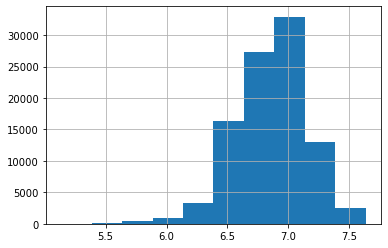

In [10]:
# sub3['sqfeet'].hist()
np.log(sub3['sqfeet']).hist()

In [11]:
sub3['sqfeet_log'] = np.log(sub3['sqfeet'])

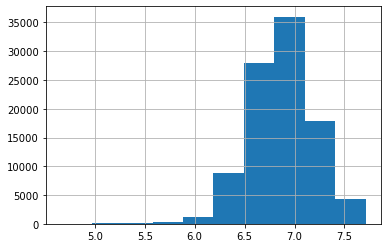

In [12]:
np.log(sub3['price']).hist()

In [ ]:
sub3['price_log'] = np.log(sub3['price'])

# Data Clearning: Pets Allowed

In [13]:
## Create a new column called 'pets_allowed' where either cats or dogs are allowed meaning pets in general allowed. 
temp = sub3[['cats_allowed', 'dogs_allowed']].apply(sum, axis=1)
pets_allowed = []
for t in temp:
  if t == 0:
    pets_allowed.append(0)
  else:
    pets_allowed.append(1)
sub3['pets_allowed'] = pets_allowed

# Data Cleaning: Type

<Figure size 432x288 with 0 Axes>

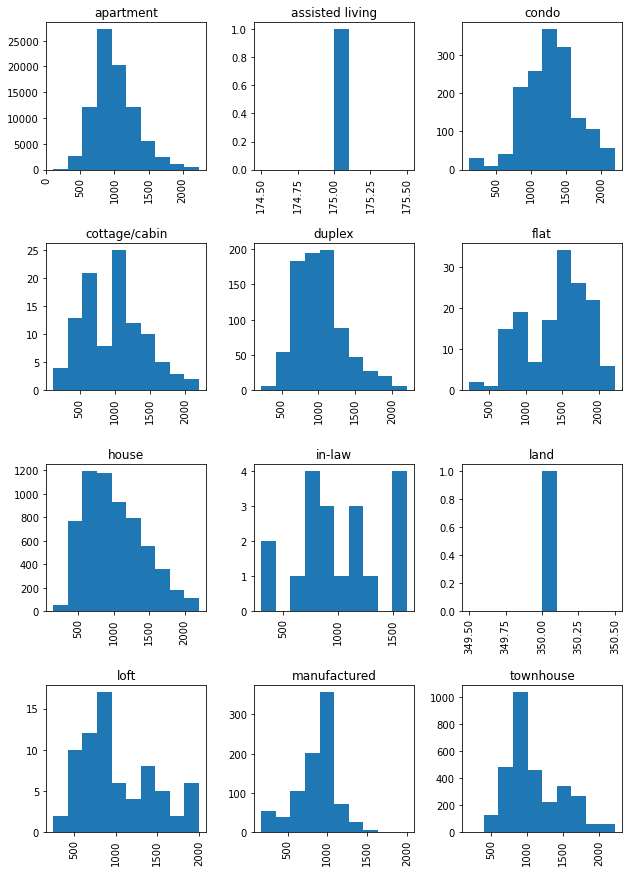

In [15]:
plt.figure()
sub3['price'].hist(by=sub3['type'],figsize=(10,15))
plt.show()

In [16]:
## Drop category of "Assisted Living" as this seems to be an outlier
sub3 = sub3[sub3['type'] !='assisted living']
sub3 = sub3[sub3['type'] !='land']

In [17]:
sub3['type'].value_counts()

apartment        84055
house             6121
townhouse         3057
condo             1543
manufactured       866
duplex             826
flat               149
cottage/cabin      103
loft                72
in-law              19
Name: type, dtype: int64

In [18]:
sub3.groupby('type').mean()['price'].sort_values(ascending=False)

type
flat             1417.389262
condo            1267.819183
townhouse        1105.193327
duplex           1057.438257
loft             1016.666667
in-law           1006.315789
house            1005.091978
apartment        1002.440688
cottage/cabin     983.436893
manufactured      875.288684
Name: price, dtype: float64

# Feature Engineering Parking Options

In [19]:
sub3['parking_options'].unique()

array(['attached garage', nan, 'off-street parking', 'street parking',
       'carport', 'detached garage', 'valet parking', 'no parking'],
      dtype=object)

In [26]:
print('The average price of the whole rents is: ', sub3['price'].mean())
print('The average price of rents with null parking options is: ',sub3[sub3['parking_options'].isnull()]['price'].mean())
print('The average price of rents with null parking options is: ',sub3[sub3['parking_options'].isnull()]['price'].median())

The average price of the whole rents is:  1010.0442098521862
The average price of rents with null parking options is:  1011.3598662791968
The average price of rents with null parking options is:  975.0


In [24]:
sub3.groupby('parking_options').median()['price'].sort_values(ascending=False)

parking_options
attached garage       1390
valet parking         1100
no parking            1050
carport               1025
detached garage        980
street parking         950
off-street parking     899
Name: price, dtype: int64

In [23]:
sub3.groupby('parking_options').mean()['price'].sort_values(ascending=False)

parking_options
attached garage       1339.011809
valet parking         1283.058824
no parking            1123.494726
carport               1089.130387
detached garage       1077.006308
street parking        1005.675149
off-street parking     945.137690
Name: price, dtype: float64

In [25]:
sub3['parking_options'].value_counts()

off-street parking    34781
attached garage        5335
street parking         5187
carport                2715
detached garage        2061
no parking              948
valet parking            17
Name: parking_options, dtype: int64

<Figure size 432x288 with 0 Axes>

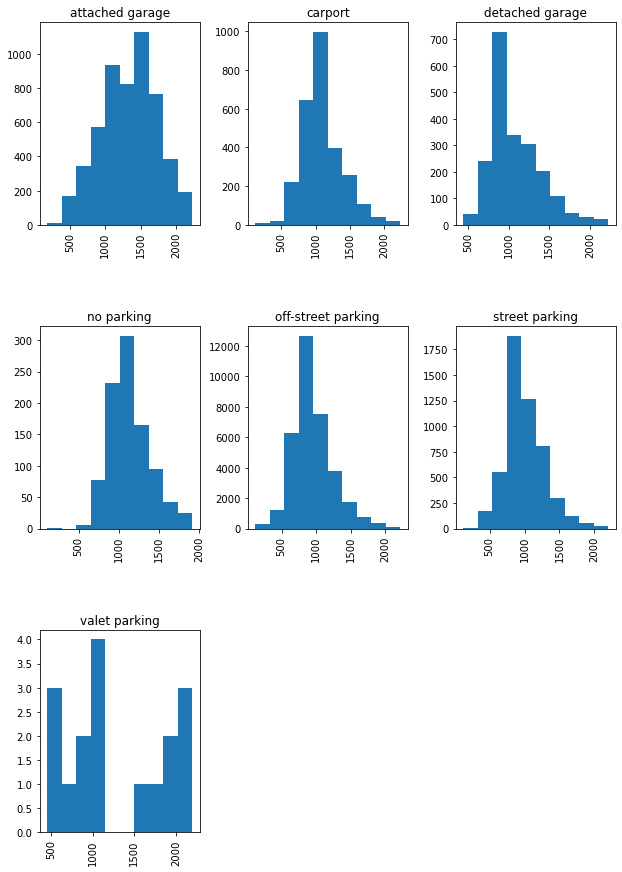

In [33]:
plt.figure()
sub3['price'].hist(by=sub3['parking_options'],figsize=(10,15))
plt.show()

In [31]:
# temp = (sub3.groupby('parking_options').median()['price'] > 1500).reset_index()
# park_ones =  list(temp[temp['price']==True]['parking_options'])
park_2 = ['attached garage']
park_0 = ['off-street parking']

park_dummy = []
for park in sub3['parking_options']:
  if park in park_2:
    park_dummy.append('two')
  elif park in park_0:
    park_dummy.append('zero')
  else:
    park_dummy.append('one')

sub3['park_dummy'] = park_dummy

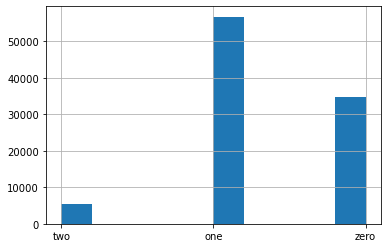

In [34]:
sub3['park_dummy'].hist()

# Feature Engineering: Laundry Options

In [35]:
sub3['laundry_options'].value_counts()

w/d hookups           29825
w/d in unit           25384
laundry on site       13332
laundry in bldg        2369
no laundry on site      434
Name: laundry_options, dtype: int64

In [36]:
sub3.groupby('laundry_options').mean()['price'].sort_values(ascending=False)

laundry_options
w/d in unit           1169.114718
w/d hookups            983.936798
laundry in bldg        865.847193
laundry on site        832.012076
no laundry on site     711.147465
Name: price, dtype: float64

The number of missing value is:  25467
The average price of missing value is:  993.7743746809597


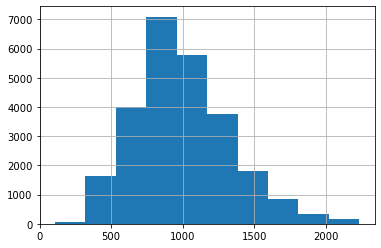

In [37]:
## Check the price values of NaN Laundry Options
print('The number of missing value is: ', sub3['laundry_options'].isnull().sum())
print('The average price of missing value is: ',sub3[sub3['laundry_options'].isnull()]['price'].mean())
sub3[sub3['laundry_options'].isnull()]['price'].hist()

<Figure size 432x288 with 0 Axes>

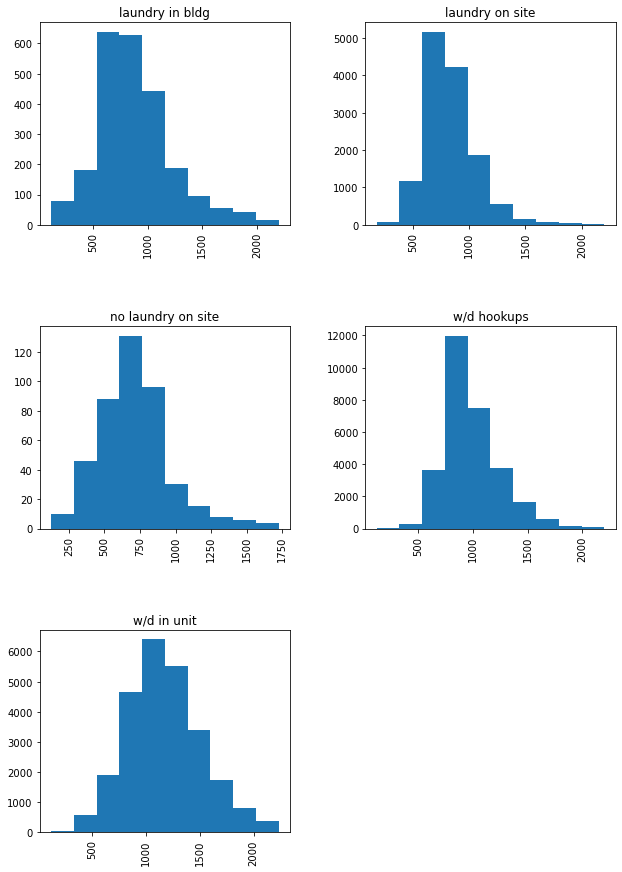

In [38]:
plt.figure()
sub3['price'].hist(by=sub3['laundry_options'],figsize=(10,15))
plt.show()

In [39]:
## It seems in_unit laundry implies a higher rent price
in_unit = ['w/d in unit']
in_building = ['laundry on site','w/d hookups','laundry in bldg']
no_laundry = ['no laundry on site']

laundry_dummy = []
for laundry in sub3['laundry_options']:
  if laundry in in_unit:
    laundry_dummy.append('in_unit')
  elif laundry in no_laundry:
    laundry_dummy.append('no_laundry')
  else:
    laundry_dummy.append('in_building')
sub3['laundry_dummy'] = laundry_dummy

# Feature Engineering: State and Region

In [40]:
sub3['state'].value_counts()

fl    29990
ga    13433
tn    11167
sc     9438
al     8050
la     5458
ky     5154
ms     4779
nc     4519
il     2575
in     2024
mi       75
oh       23
mo       19
mn       16
tx       13
pa       10
ny       10
nj       10
va        9
wv        7
ar        6
ca        5
ia        5
ct        4
or        3
ri        1
md        1
az        1
me        1
nm        1
nh        1
de        1
ks        1
ok        1
Name: state, dtype: int64

In [55]:
states = ['fl','ga','tn','sc','al','la','ky','ms','nc','il','in']
sub3 = sub3[sub3['state'].isin(states)]
sub3['state'].value_counts()

fl    29990
ga    13433
tn    11167
sc     9438
al     8050
la     5458
ky     5154
ms     4779
nc     4519
il     2575
in     2024
Name: state, dtype: int64

In [56]:
## It looks make sense to include 'state' as categorical variable
sub3.groupby('state').mean()['price'].sort_values(ascending=False)

state
fl    1170.380493
nc    1152.090285
sc    1076.412376
la     960.316783
ga     931.676990
tn     922.638757
al     875.746211
in     870.941206
ky     853.827513
ms     796.102113
il     787.190680
Name: price, dtype: float64

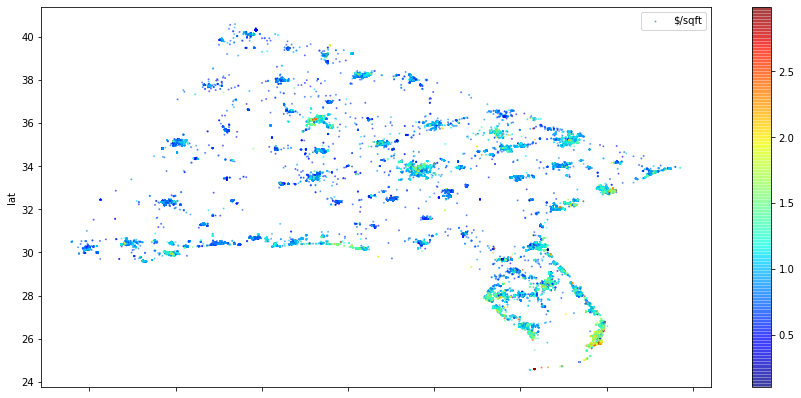

In [57]:
sub3.plot(kind='scatter', x='long', y='lat', alpha=0.5,
         s=1, label='$/sqft',  
         c=sub3['price']/sub3['sqfeet'],   #  set symbol color on house value 
         cmap=plt.get_cmap('jet'),      
         colorbar=True,
         figsize=(15,7))
plt.legend()

# Check Correlations across Columns

In [62]:
## Preprocess Boolean variables to one-hot
bool_cols = ['smoking_allowed','wheelchair_access','electric_vehicle_charge','comes_furnished','comes_furnished']
bool_vars = sub3[bool_cols]
sub3[bool_cols] = sub3[bool_cols].astype(int)

sub3_processed = sub3.copy()[['price','type','pets_allowed','smoking_allowed','wheelchair_access','electric_vehicle_charge','comes_furnished','laundry_dummy','park_dummy','sqfeet','sqfeet_log','beds','baths','lat','long','state']]

In [59]:
corr_matrix = sub3.corr()
corr_matrix["price"].sort_values(ascending=False)

price                      1.000000
sqfeet_log                 0.399741
sqfeet                     0.395947
long                       0.324088
baths                      0.266881
beds                       0.209745
id                         0.124596
electric_vehicle_charge    0.059666
wheelchair_access          0.008690
pets_allowed               0.000678
dogs_allowed               0.000674
cats_allowed              -0.001915
comes_furnished           -0.024932
smoking_allowed           -0.123888
lat                       -0.310884
k_mean                          NaN
Name: price, dtype: float64

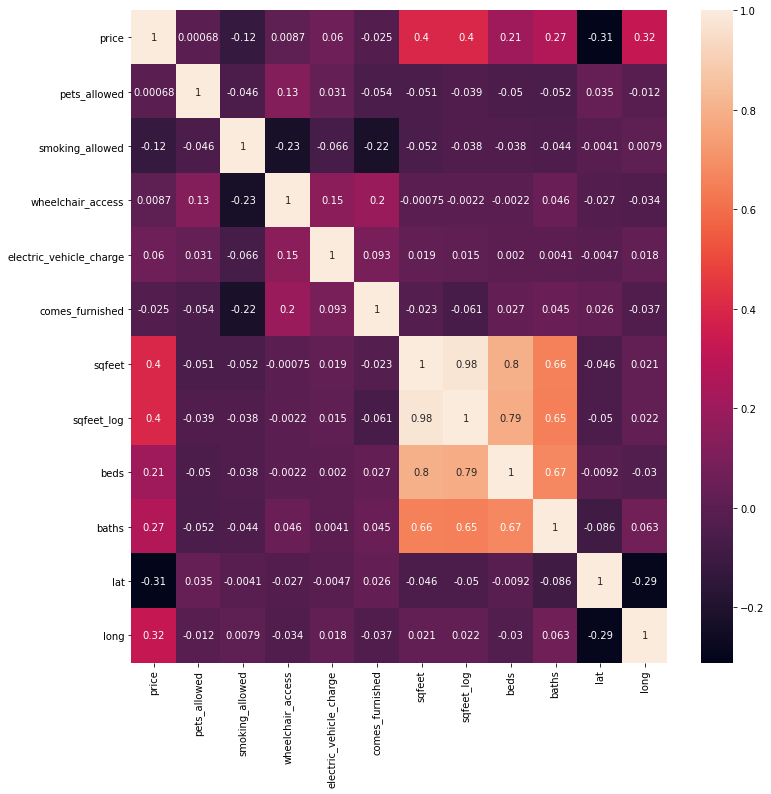

In [63]:
fig, ax = plt.subplots(figsize=(12,12))         
sns.heatmap(sub3_processed.corr(),annot=True, ax=ax)

# Split and Preprocess the Dataset

In [64]:
# I did not include several columns such as 'id','url', 'region','image_url','description' for now.
# y = sub3_processed['price']
y = sub3_processed['price']
X = sub3_processed.drop(columns=['price'])

X.shape,y.shape

((96587, 15), (96587,))

In [66]:
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_raw.shape, y_train.shape, X_test_raw.shape, y_test.shape

((72440, 15), (72440,), (24147, 15), (24147,))

In [67]:
cat_cols = ['type','laundry_dummy','state']
con_cols = ['sqfeet','beds','baths']

from sklearn.preprocessing import StandardScaler
preprocessor_dummy = ColumnTransformer(transformers=[('cat', OneHotEncoder(categories='auto', drop='first'), cat_cols),
                                                   ('cont', StandardScaler(), con_cols)])

In [68]:
X_train_dummy = preprocessor_dummy.fit_transform(X_train_raw)
X_test_dummy = preprocessor_dummy.transform(X_test_raw)

# Building a model

## Simple Linear Regression

In [69]:
from sklearn import linear_model
from sklearn.metrics import r2_score
lin_reg = linear_model.LinearRegression(n_jobs=1)
model = lin_reg.fit(X_train_dummy, y_train)

y_test_pred = lin_reg.predict(X_test_dummy)
y_train_pred = lin_reg.predict(X_train_dummy)

print('The R2 score is: ',model.score(X_test_dummy, y_test))

from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_test_pred) 
lin_rmse = np.sqrt(lin_mse) 
print('The RMSE is: ', lin_rmse)

The R2 score is:  0.40412865416637933
The RMSE is:  247.200784938475


### Ridge Regression

In [70]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline

alphas = np.logspace(-3, 1.5, num = 30)

model = RidgeCV(alphas = alphas,fit_intercept = True, normalize = False)
model.fit(X_train_dummy, y_train)
# model = ridge_reg.fit(X_train, y_train)
y_test_pred = model.predict(X_test_dummy)
y_train_pred = model.predict(X_train_dummy)

print('The best alpha is: ', model.alpha_)
print('The R2 score is: ',model.score(X_test_dummy, y_test))

lin_mse = mean_squared_error(y_test, y_test_pred) 
lin_rmse = np.sqrt(lin_mse) 
print('The RMSE is: ',lin_rmse)

The best alpha is:  7.5737391758950094
The R2 score is:  0.4041763096019507
The RMSE is:  247.19089966985928


## Preprocessing: ColumnTransformation {'cat', OneHotEncoder, 'con', StandardScaler}

In [71]:
preprocessor_ohe = ColumnTransformer(transformers=[('cat', OneHotEncoder(categories='auto'), cat_cols),
                                                   ('cont', StandardScaler(), con_cols)])

In [72]:
X_train_ohe = preprocessor_ohe.fit_transform(X_train_raw)
X_test_ohe = preprocessor_ohe.transform(X_test_raw)

### K-Nearest-Neigbor Regression

In [73]:
from sklearn import neighbors

knn_reg = neighbors.KNeighborsRegressor(n_neighbors=20,
                                        weights='uniform',  # ‘distance’ weights points by inverse of their distance
                                        algorithm='auto',  # out of ‘ball_tree’, ‘kd_tree’, ‘brute’
                                        leaf_size=30)  # for tree algorithms

model = knn_reg.fit(X_train_ohe, y_train)
y_test_pred = model.predict(X_test_ohe)
y_train_pred = model.predict(X_train_ohe)

knn_mse = mean_squared_error(y_test, y_test_pred) 
knn_rmse = np.sqrt(knn_mse) 
print('The RMSE is: ',knn_rmse)

print('The R2 score is: ',model.score(X_test_ohe, y_test))

The RMSE is:  188.6186430963331
The R2 score is:  0.6530858268390416


## Decision Tree Regression

In [74]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
model = tree_reg.fit(X_train_ohe, y_train)

y_test_pred = model.predict(X_test_ohe)
y_train_pred = model.predict(X_train_ohe)

tree_mse = mean_squared_error(y_test, y_test_pred) 
tree_rmse = np.sqrt(tree_mse) 
print('The RMSE is: ',tree_rmse)
print('The R2 score is: ', model.score(X_test_ohe, y_test))

The RMSE is:  179.13508502919194
The R2 score is:  0.6870938355009414


## Random Forest Regression

In [75]:
from sklearn import ensemble

rf_reg = ensemble.RandomForestRegressor(n_estimators=10,  # number of trees
                                        criterion='mse',  # how to measure fit
                                        max_depth=None,  # how deep tree nodes can go
                                        min_samples_split=2,  # samples needed to split node
                                        min_samples_leaf=1,  # samples needed for a leaf
                                        min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                                        max_features='auto',  # max feats
                                        max_leaf_nodes=None,  # max nodes
                                        n_jobs=1, # how many to run parallel
                                        random_state=42)

model = rf_reg.fit(X_train_ohe, y_train.ravel())
y_test_pred = model.predict(X_test_ohe)
y_train_pred = model.predict(X_train_ohe)

rf_mse = mean_squared_error(y_test, y_test_pred) 
rf_rmse = np.sqrt(rf_mse) 
print('The RMSE is: ',rf_rmse)

# Accuracy score
print('The R2 score is: ', model.score(X_test_ohe, y_test))

The RMSE is:  162.94819215384754
The R2 score is:  0.7410881643761111


In [79]:
from sklearn import ensemble

rf_reg = ensemble.RandomForestRegressor(n_estimators=100,  # number of trees
                                        criterion='mse',  # how to measure fit
                                        max_depth=None,  # how deep tree nodes can go
                                        min_samples_split=2,  # samples needed to split node
                                        min_samples_leaf=1,  # samples needed for a leaf
                                        min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                                        max_features= 6,  # max feats
                                        max_leaf_nodes=None,  # max nodes
                                        n_jobs=1, # how many to run parallel
                                        random_state=42)

model = rf_reg.fit(X_train_ohe, y_train.ravel())
y_test_pred = model.predict(X_test_ohe)
y_train_pred = model.predict(X_train_ohe)

rf_mse = mean_squared_error(y_test, y_test_pred) 
rf_rmse = np.sqrt(rf_mse) 
print('The RMSE is: ',rf_rmse)

# Accuracy score
print('The R2 score is: ', model.score(X_test_ohe, y_test))

The RMSE is:  160.1932490464534
The R2 score is:  0.74976893144553


## Fine tune the hyperparameters on Random Forest

In [80]:
# Credit: https://medium.com/@manilwagle/predicting-house-prices-using-machine-learning-cab0b82cd3f
from sklearn.model_selection import GridSearchCV
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [10,20,30,50], 'max_features': [2,4,6,8,16]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
rf_reg = ensemble.RandomForestRegressor(random_state=42)

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(rf_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train_ohe, y_train.ravel())
grid_search.best_params_

{'max_features': 16, 'n_estimators': 50}

In [81]:
final_model = grid_search.best_estimator_

y_test_pred = final_model.predict(X_test_ohe)
y_train_pred = final_model.predict(X_train_ohe)

rf_mse = mean_squared_error(y_test, y_test_pred) 
rf_rmse = np.sqrt(rf_mse) 
print('The RMSE is: ',rf_rmse)

# Accuracy score
print('The R2 score is: ', final_model.score(X_test_ohe, y_test))

The RMSE is:  159.79017473413074
The R2 score is:  0.7510265977154245


In [ ]:
final_model = grid_search.best_estimator_

y_test_pred = final_model.predict(X_test_ohe)
y_train_pred = final_model.predict(X_train_ohe)

rf_mse = mean_squared_error(y_test, y_test_pred) 
rf_rmse = np.sqrt(rf_mse) 
print('The RMSE is: ',rf_rmse)

# Accuracy score
print('The R2 score is: ', final_model.score(X_test_ohe, y_test))

## Saving model and find the centroid

In [ ]:
import joblib
model = ...
joblib.dump(model, 'km-model.joblib')

In [ ]:
def centroid(train):
    return np.array([train['lat'].sum(), train['long'].sum()]) / len(train)

In [ ]:
centroid_3 = centroid(sub3)